# OneMax Problem

In [174]:
from deap import base, creator, tools

import random
import matplotlib.pyplot as plt

In [175]:
# Problem Constants
ONE_MAX_LENGTH = 100

# Genetic Constants
POPULATION_SIZE = 200 # Number of individuals in simulation
P_CROSSOVER = 0.9 # Probability for crossover
P_MUTATION = 0.9 # Probability for mutataion

MAX_GENERATIONS = 50

# Random seed for experimenting
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [176]:
toolbox = base.Toolbox()

toolbox.register("zeroOrOne", random.randint, 0, 1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness = creator.FitnessMax)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def oneMaxFitness(individual):
    return sum(individual), # Returning a tuple

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 1.0/ONE_MAX_LENGTH)

# Solving the problem
population = toolbox.populationCreator(n=POPULATION_SIZE)
generationCounter = 0

fitnessValues = list(map(toolbox.evaluate, population))

for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue
    
fitnessValues = [individual.fitness.values[0] for individual in population]

maxFitnessValues = []
meanFitnessValues = []

/home/luna/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/luna/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [177]:
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter <MAX_GENERATIONS:
    generationCounter += 1
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    # Mating every even index with the corresponding one
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
    freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
    for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
        individual.fitness.values = fitnessValue
    population[:] = offspring
    fitnessValues = [ind.fitness.values[0] for ind in population]
    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(fitnessValues)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print("Generation {}: Max Fitness = {}, Average Fitness = {}".format(generationCounter, maxFitness, maxFitness))
    
    best_index = fitnessValues.index(max(fitnessValues))
    print("Best Individual = ", population[best_index], "\n")

Generation 1: Max Fitness = 64.0, Average Fitness = 64.0
Best Individual =  [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0] 

Generation 2: Max Fitness = 66.0, Average Fitness = 66.0
Best Individual =  [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1] 

Generation 3: Max Fitness = 69.0, Average Fitness = 69.0
Best Individual =  [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 

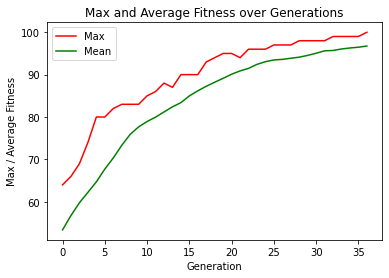

In [179]:
plt.plot(maxFitnessValues, color='r', label="Max")
plt.plot(meanFitnessValues, color='g', label="Mean")
plt.xlabel('Generation')
plt.legend()
plt.ylabel('Max / Average Fitness')
plt.title("Max and Average Fitness over Generations")
plt.show()